<h1 align="center">Computational Linear Algebra, Demo 4</h1>

<br>

In [1]:
import numpy as np
import sympy as sp
import scipy
import matplotlib.pyplot as plt
import math

<h3 align="left">Tehtävä 1</h3>

Kirjoita alle funktio, joka ottaa parametriksi matriisin ja palauttaa siihen liittyvän **pseudoinverssihajotelman**. Eli funktion tulee palauttaa kolme matriisia $\mathbf{V}, \,$ $\mathbf{\Sigma^+} \,$ ja $\, \mathbf{U}$ määritelmän [7.1.1](https://tim.jyu.fi/view/kurssit/matematiikka/MATA123/2023k/vk4#huomautus) mukaisesti (tässä järjestyksessä) siten, että

$$ A^+ = V \Sigma^+ \, U^T. $$

In [2]:
def psinv_hajotelma(A):
    
    U, S, V = np.linalg.svd(A)
    
    # Poistetaan matriisin A singulaariarvoista mahdolliset nollat,
    # jottei jaeta nollalla.
    S = S[S!=0]
    
    # Luodaan diagonaalimatriisi matriisin A positiivisista singulaariarvoista.
    diag_S = np.diag(1/S)
    
    # Huomaa, että pseudoinverssissä, kun A on m x n -matriisi, 
    # niin Sigma puolestaan on n x m -matriisi (sen dimensiot ovat siis A:n transpoosin dimensiot).
    Sigma = np.zeros_like(A.T)

    for i in range(len(S)):
        Sigma[i, i] = diag_S[i, i]
    
    # Huomaa, että np.linalg.svd() palauttaa matriisin V jo valmiiksi transponoituna,
    # joten jos halutaan palauttaa V (ilman transpoosia), niin siitä täytyy ottaa toinen transpoosi,
    # sillä (V^T)^T = V.
    return (V.T, Sigma, U)

In [3]:
A = np.zeros((4, 5))
A[0, 0] = 1
A[0, 4] = 2
A[1, 2] = 3
A[3, 1] = 2

Tarkistetaan NumPyn valmista funktiota käyttäen, mikä matriisin A pseudoinverssihajotelma on.

In [4]:
np.linalg.pinv(A)

array([[0.2       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4       , 0.        , 0.        , 0.        ]])

Funktion **psinv_hajotelma** pitäisi palauttaa kolme matriisia, joiden matriisitulo tuottaa saman matriisin kuin yllä.

In [5]:
V, Sigma, U = psinv_hajotelma(A)

In [6]:
V @ Sigma @ U.T

array([[0.2       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4       , 0.        , 0.        , 0.        ]])

- **OK!**

<br>

<br>

<h3 align="left">Tehtävä 2</h3>

Normaalissa singulaariarvohajotelmassa saadaan paljon "ylimääräistä" tietoa, ainakin siltä kannalta, jos tarkoituksena on vain alkuperäisen matriisin uudelleen konstruoiminen. Tässä tehtävässä on tarkoitus tehdä funktio, joka ottaa parametriksi matriisin ja palauttaa kompaktin singulaariarvohajotelman.

Olkoon $A$ m x n -matriisi ja $r = rank(A)$. Kompaktilla singulaariarvohajotelmalla tarkoitetaan kolmikkoa $\, U_c, \,$ $\, \Sigma_c \,$ ja $\, V_c \,$.

- $\, U_c \,$ on m x r -matriisi, joka saadaan SVD-hajotelman matriisista U poimimalla r ensimmäistä saraketta.
- $\, \Sigma_c \,$ on SVD-hajotelman matriisin $\, \Sigma \,$ r x r -alimatriisi sen vasemmasta yläkulmasta lukien.
- $\, V_c \,$ on n x r -matriisi, joka saadaan SVD-hajotelman matriisista V poimimalla r ensimmäistä saraketta.

In [7]:
def kompakti_svd(A):
    
    # Suoritetaan eka normaali SVD-hajotelma.
    U, S, V = np.linalg.svd(A)
    
    # Tallennetaan parametrina syötetyn matriisin A aste (rank) muuttujaan r.
    r = np.linalg.matrix_rank(A)
    
    # Poimitaan matriisiin Uc matriisin U r ensimmäistä saraketta.
    Uc = U[:, :r]
    
    # Luodaan matriisi Sigma normaaliin tapaan, 
    # jotta tästä voidaan poimia r x r -alimatriisi (vasemmasta yläkulmasta alkaen).
    # Matriisin Sigma dimensiot tulee vastata matriisin A dimensioita.
    Sigma = np.zeros_like(A)
    
    # Poistetaan matriisin A singulaariarvoista mahdolliset nollat. 
    # tämän tekeminen ei ole tarpeellista, mutta ei vaikuta mihinkään mitenkään,
    # koska matriisi Sigma on täynnä nollia anyway, 
    # joten nollan paikalle laitettaisiin vaan nolla.
    S = S[S!=0]
    
    # Sijoitetaan for-silmukan avulla matriisin Sigma diagonaalille 
    # matriisin A positiiviset singulaariarvot.
    for i in range(len(S)):
        Sigma[i, i] = S[i]
    
    # Poimitaan matriisista Sigma r x r -alimatriisi vasemmasta yläkulmasta alkaen.
    # Tämä poistaa turhat nollarivit ja -sarakkeet, 
    # koska positiivisia singulaariarvoja on yhtä monta kuin matriisin rank on.
    Sigmac = Sigma[:r, :r]
    
    # Poimitaan matriisista V r ensimmäistä saraketta.
    # Huom! np.linalg.svd() palauttaa matriisin V jo valmiiksi transponoituna,
    # mutta tässä tehtävässä piti palauttaa matriisi V normaalimuodossaan, 
    # eli (V^T)^T = V, jolloin voidaan seurata kaavaa A = U Sigma V^T.
    # Normaalistihan np.linalg.svd() -funktiota käyttämällä ei tarvitse enää
    # transponoida matriisia V, koska se on jo valmiiksi transponoitu.
    Vc = V.T[:, :r]
    
    return (Uc, Sigmac, Vc)

In [8]:
A = np.zeros((4, 5))
A[0, 0] = 1
A[0, 4] = 2
A[1, 2] = 3
A[3, 1] = 2

Tarkistetaan, saadaanko **kompakti_svd** -funktiolla matriisi A, eli päätekö

$$ A = U \Sigma V^T. $$

In [9]:
A

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.]])

In [10]:
u, sigma, v = kompakti_svd(A)

In [11]:
u @ sigma @ v.T

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.]])

In [12]:
np.allclose(u @ sigma @ v.T, A)

True

- **OK!**

<br>

<br>

<h3 align="left">Tehtävä 4, approksimaatiomatriisi</h3>

Kirjoita funktio $reduced(A, k)$, joka ottaa parametriksi matriisin A ja luvun $k < rank(A) \,$ ja palauttaa matriisin $A_k$, kuten lauseessa 7.4.1.

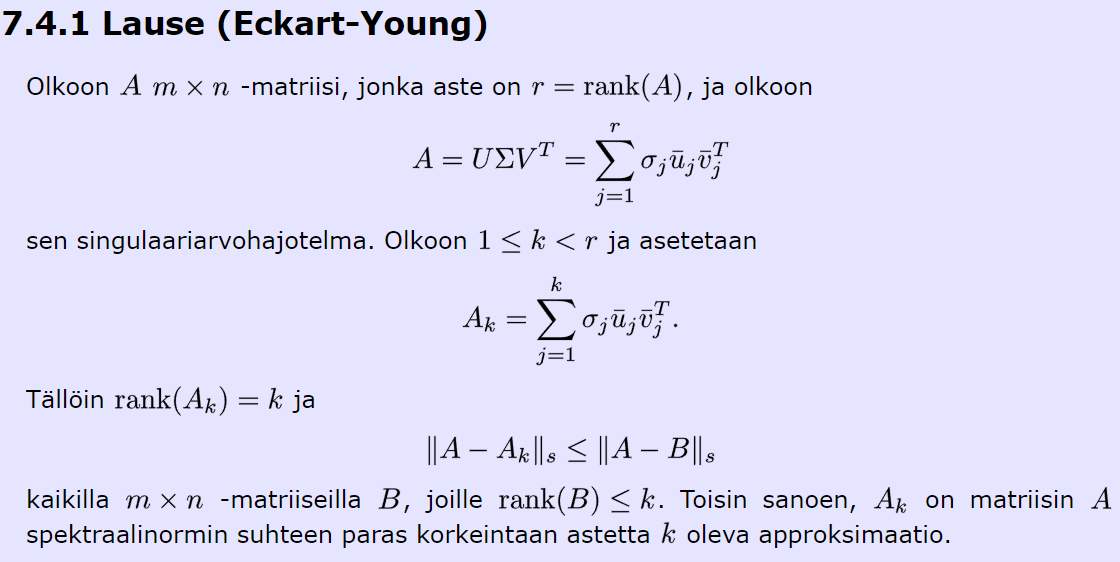

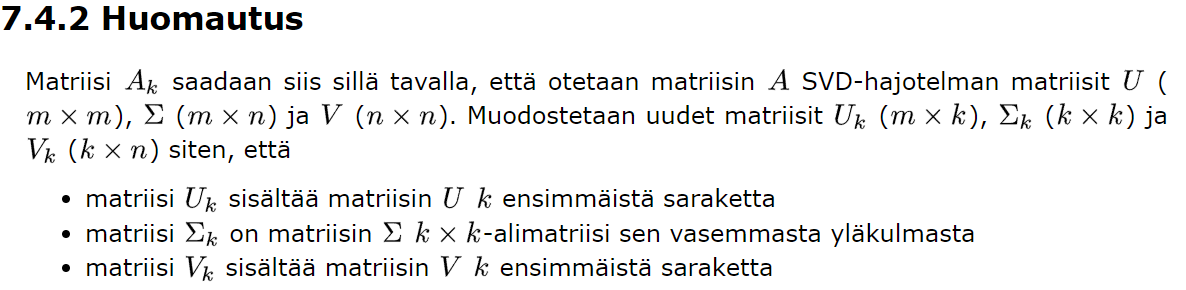

In [20]:
def reduced(A, k):
    
    # Muodostetaan täysi SVD. Huomaa, että np.linalg.svd(A) palauttaa matriisin V \
    # valmiiksi transponoituna. 
    # Approksimaatiomatriisia varten V täytyy muuntaa takaisin normaaliin muotoon (ei transpoosiin)
    # (joka onnistuu ottamalla siitä uusi transpoosi, sillä (V^T)^T = V).
    # Tämä johtuu siitä, että matriisin V alimatriisiin V_k tarvitaan sarakkeet matriisin V \
    # normaalista muodosta.
    U, S, VT = np.linalg.svd(A)
    V = VT.T
    
    # Muodostetaan matriisi Sigma. 
    
    # Poistetaan vektorista S, joka sisältää matriisin A positiiviset singulaariarvot, 
    # mahdolliset nollat. Tätä ei tarvitsisi tehdä normaalissa SVD:ssä, 
    # mutta laskettaessa matriisin A yleistettyä käänteismatriisia (pseudoinverssiä),
    # matriisin Sigma diagonaalilla on matriisin A positiivisten singulaariarvojen käänteisluvut,
    # jolloin nollalla jakaminen on ongelma.
    # Tässäkään nollien poistaminen ei ole ongelma, joten tehdään se aina joka tapauksessa.
    S = S[S!=0]
    
    # Sigman dimensiot ovat samat kuin matriisilla A.
    # np.zeros_like(A) luo matriisin, joka on täynnä nollia ja jolla on samat dimensiot kuin \
    # matriisilla A.
    Sigma = np.zeros_like(A)
    
    # Sijoitetaan matriisin A positiiviset singulaariarvot matriisin Sigma diagonaalille.
    for i in range(len(S)):
        Sigma[i, i] = S[i]
    
    # Luodaan alimatriisit (ks. lause 7.4.1 ja huomautus 7.4.2)
    U_k = U[:, :k]
    Sigma_k = Sigma[:k, :k]
    V_k = V[:, :k]
    
    # Palautetaan approksimaatiomatriisi A_k
    return U_k @ Sigma_k @ V_k.T

In [21]:
M = np.array([[1.,2,3],[-1,2,0],[1,0,2],[1,-1,0]])

In [22]:
k = np.linalg.matrix_rank(M) - 1

- $k$:n täytyy olla pienempi kuin $rank(A)$.

In [23]:
reduced(M, k)

array([[ 0.90742886,  1.94846026,  3.06026436],
       [-1.06547308,  1.96354732,  0.04262336],
       [ 1.17419184,  0.09698274,  1.88660008],
       [ 0.74435072, -1.14233484,  0.16642919]])

<br>

<br>

<h3 align="left">Tehtävä 5, approksimaatio tietyllä tarkkuudella</h3>

Tässä tehtävässä käytetään hyväksi tulosta, jonka mukaan matriisille $\, A_k \,$ pätee

$$ ||A - A_k||_s = \sigma_{k+1} \,$$ 

$$\forall \, {k = 1,2,...,rank(A)}.$$

Tee tämän avulla ohjelma $\, approx(A, \, r) \,$, missä parametreina on matriisi A ja reaaliluku r > 0 ja joka palauttaa pienin asteisen (matriisin asteen mukaan) approksimaatioista $\, A_k \,$ siten, että

$$ ||A - A_k||_s \le r. $$

In [24]:
def approx(A, r):
    
    k = np.linalg.matrix_rank(A) 
    
    U, S, VT = np.linalg.svd(A)
    V = VT.T
    
    U_k = U[:, :k]
    Sigma_k = np.diag(S[:k])
    V_k = V[:, :k]
    A_k = U_k @ Sigma_k @ V_k.T
    
    for i in range(1, k):
        
        U_i = U[:, :i]
        Sigma_i = np.diag(S[:i])
        V_i = V[:, :i]
        A_i = U_i @ Sigma_i @ V_i.T
        norm_i = np.linalg.norm(A - A_i)
        
        if (norm_i <= r) and (np.linalg.matrix_rank(A_i) < np.linalg.matrix_rank(A_k)):
            A_k = A_i
            
    return A_k

In [25]:
m = np.array([[1, 2, 4], [4, 6, 3], [4, 4, 5]])

In [26]:
approx(m, 3)

array([[2.0360677 , 2.64637522, 2.42419881],
       [3.74253654, 4.86435494, 4.45596804],
       [3.68939705, 4.79528698, 4.39269868]])